In [1]:
import pandas as pd
from dataworks import DataWorks
dws = DataWorks()



In [80]:
def load_choice_file(path, field, name):
    """读取choice数据终端导出的数据文件.
        Choiced导出文件格式对应的处理规则. 
        - 原文件第一行为“宏观数据“或类似内容,但read_excel方法未加载该行内容
        - 数据的第一行作为指标标题
        - 第一列作为日期
        - 前六行和最后一行都不是数据内容
        - 剔除“日期”字段为空的行和其他非数据内容（标识数据来源的文字内容）
        
        Choice文件导出注意事项:
        - 导出字段选择:指标名称、频率、单位、来源
        - 日期排序:降序
        - 图形设置:不导出图形
        - 勾选“使用函数方式导出”
    Args:
        file_path (str): Choice导出文件(.xlsx)的绝对路径

    Returns:
        dataframe: 将Choice导出文件内容加载到dataframe,并返回
    """
    if path=='':
        return None
    df = pd.read_excel(path)
    df.columns = df.iloc[0]
    df.rename(columns={df.columns[0]: 'date'}, inplace=True)
    df = df.iloc[6:]
    if isinstance(field, list):
        df[name] = df[field[0]] + df[field[1]]
        df = df[['date', name]]
    else:
        df.rename(columns={field: name}, inplace=True)
        df = df[['date', name]]
        
    # df.reset_index(drop=True, inplace=True)
    # df.set_index('date', inplace=True)
    df.dropna(axis=0, subset=['date'], inplace=True)
    df = df[df['date'] != '数据来源：东方财富Choice数据']
    df['date'] = pd.to_datetime(df['date'])
    return df

In [3]:
import akshare as ak
trade_date = ak.tool_trade_date_hist_sina()['trade_date']
trade_date.iloc[0]

datetime.date(1990, 12, 19)

In [81]:
config = dws.get_variety_setting('setting/variety.json')
variety_config = config['RB']
combined_df = None
for data_type, data_info in variety_config['DataIndex'].items():
    # 从文件中加载指定字段的数据
    data_df = load_choice_file(data_info['Path'], data_info['Field'], data_info['Name'])
    
    # 将数据添加到combined_df中
    # combined_df = pd.concat([combined_df, data_df], axis=1)
    combined_df = pd.merge(combined_df, data_df, on='date', how='outer') if combined_df is not None else data_df
# combined_df.dropna(axis=0, subset=['date'], inplace=True)

In [2]:
import pandas as pd
df_basis = dws.get_data_by_sql('SELECT * FROM basis')
df_basis = df_basis[['date', 'dom_basis']]

In [3]:
df_basis['date'] = pd.to_datetime(df_basis['date'])
ts = df_basis.set_index('date')['dom_basis']

In [19]:
import re

def extract_variables(format_str):
    # 正则表达式模式，匹配非空字符（即变量）
    pattern = r'\{.*?\}'
    # 使用正则表达式查找所有匹配的变量名
    variables = re.findall(pattern, format_str)
    # 去除花括号并返回结果
    return [var[1:-1] for var in variables]

# 示例四则运算公式字符串
format_str = "a * b / (c % d) + e - f ** g"
format_str2 = "{abc:efg} + {137a:mn}"

# 提取并打印变量列表
variables_list = extract_variables(format_str2)
print("Extracted variables:", variables_list)

Extracted variables: ['abc:efg', '137a:mn']


In [12]:
import re
def extract_variables(format_str):
    """
    从格式字符串中提取变量名，包括可能包含冒号 ":" 的变量。

    参数:
    format_str: 一个包含变量名的字符串。例如："abc:efg + 137a:mn + name + age"

    返回值:
    一个包含所有提取出的变量名（可能含有冒号）的列表。例如：['abc:efg', '137a:mn', 'name', 'age']。
    """
    # 定义用于匹配可能包含冒号的变量名的正则表达式模式
    variable_pattern = r'\w[\w:()%]*'
    # 使用正则表达式查找所有匹配的变量名
    variables = re.findall(variable_pattern, format_str)
    return variables  # 直接返回找到的变量名列表，无需额外处理

format_str2 = "库存:热卷(板)"

# 提取并打印变量列表
variables_list = extract_variables(format_str2)
print("Extracted variables:", variables_list)

Extracted variables: ['库存:热卷(板)']


In [1]:
import json
import dataworks as dw
dws = dw.DataWorks()

In [2]:
def load_choice_file(file_path):
    """读取choice数据终端导出的数据文件.
        Choiced导出文件格式对应的处理规则. 
        - 原文件第一行为“宏观数据“或类似内容,但read_excel方法未加载该行内容
        - 数据的第一行作为指标标题
        - 第一列作为日期
        - 前六行和最后一行都不是数据内容
        - 剔除“日期”字段为空的行和其他非数据内容（标识数据来源的文字内容）
        
        Choice文件导出注意事项:
        - 导出字段选择:指标名称、频率、单位、来源
        - 日期排序:降序
        - 图形设置:不导出图形
        - 勾选“使用函数方式导出”
    Args:
        file_path (str): Choice导出文件(.xlsx)的绝对路径

    Returns:
        dataframe: 将Choice导出文件内容加载到dataframe,并返回
    """
    if file_path=='':
        return None
    df = pd.read_excel(file_path)
    df.columns = df.iloc[0]
    df.rename(columns={df.columns[0]: 'date'}, inplace=True)
    df = df[6:]
    df.reset_index(drop=True, inplace=True)
    df.dropna(axis=0, subset=['date'], inplace=True)
    df = df[df['date'] != '数据来源：东方财富Choice数据']
    df['date'] = pd.to_datetime(df['date'])
    return df

In [ ]:
common_json = 'setting/common.json'
variety_json = 'setting/variety.json'
symbol_id = "RB"

with open(common_json, encoding='utf-8') as common_file: 
    symbol_dataindex_setting = json.load(common_file)['DataIndex']
with open(variety_json, encoding='utf-8') as variety_file:
    variety_setting = json.load(variety_file)[symbol_id]     
variety_setting['DataIndex'] = {**symbol_dataindex_setting, **variety_setting['DataIndex']} if 'DataIndex' in variety_setting else symbol_dataindex_setting
symbol_setting = variety_setting


In [4]:
import pandas as pd
import re
from asteval import Interpreter

def extract_variables(format_str):
    """从格式字符串中提取变量名"""
    # 正则表达式模式，匹配非空字符（即变量）
    variable_pattern = r'\w[\w:()%]*'
    # 使用正则表达式查找所有匹配的变量名
    variables = re.findall(variable_pattern, format_str)
    return variables  # 直接返回找到的变量名列表，无需额外处理

column_dict= {}
data_frames = []
data_index = symbol_setting['DataIndex']

# dws = gs.dataworks
dws = dw.DataWorks()
for key, value_items in data_index.items():
    # 按照配置文件中的DataFrame键值，将同类内容合并到同一张表中
    df_name = value_items['DataFrame']            
    fields = value_items['Field']
    variables_list = extract_variables(fields)
    if df_name in locals():        
        # 键值是独立字段的，列名修改为key
        if len(variables_list)==1:
            locals()[df_name].rename(columns={variables_list[0]:key}, inplace=True)
    else:
        # 未加载的数据，整表读取到df_name中
        data_source = value_items['Source']
        if data_source=='Choice':
            locals()[df_name] = load_choice_file(value_items['Path'])
        elif data_source=='SQLite':
            locals()[df_name] = dws.get_data_by_symbol(value_items['Path'], symbol_id, '*')
            locals()[df_name]['date'] = pd.to_datetime(locals()[df_name]['date'])
        else:
            continue
        column_dict[df_name] = ['date']
    df = locals()[df_name]            
    if len(variables_list)==1:
        # Field是独立字段的，列名修改为key
        df.rename(columns={variables_list[0]:key}, inplace=True)
        column_dict[df_name].append(key)
    else:                
        # Field是公式表达的，进行解析计算
        aeval = Interpreter()       
        for var in variables_list:                    
            safe_var = re.sub(r'[0-9:]', '', var)
            df.rename(columns={var:safe_var}, inplace=True)                                     
            aeval.symtable[safe_var] = df[safe_var]
        safe_fields = re.sub(r'[0-9:]', '', fields)
        df[key] = aeval.eval(safe_fields)
        column_dict[df_name].append(key)
    # 根据配置中指定的填充方式填充缺失值
    if 'FillNa' in value_items:
        fill_na = value_items['FillNa']
        print(f"symbol: {symbol_id}, key: {key}")
        if fill_na=='Forward':
            df[key] = df[key].ffill()
        elif fill_na=='Backward':
            df[key] = df[key].bfill()
        # elif fill_na=='Interpolate':

symbol: RB, key: 需求
symbol: RB, key: 产量
symbol: RB, key: 开工率
symbol: RB, key: 产能利用率
symbol: RB, key: 库存


/var/folders/hc/6dqjp7bs58s2pcb47s4xfsf80000gn/T/ipykernel_28136/3172956327.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[key] = df[key].ffill()
/var/folders/hc/6dqjp7bs58s2pcb47s4xfsf80000gn/T/ipykernel_28136/3172956327.py:59: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[key] = df[key].ffill()


In [5]:
from functools import reduce
for df_key in column_dict:
    df = locals()[df_key]
    df = df[column_dict[df_key]]
    data_frames.append(df)
symbol_data = reduce(lambda left,right: pd.merge(left,right,on='date', how='outer'), data_frames)
# if "利润" in self.symbol_setting:
#     for key, value in enumerate(self.symbol_setting['利润'].items()):
#         variables_list = extract_variables(value)
#         aeval = Interpreter()       
#         for var in variables_list:                                              
#             aeval.symtable[var] = df[var]
#         self.symbol_data[key] = aeval.eval(value)

symbol_data.sort_values(by='date', ascending=True, inplace=True)
columns_to_check = symbol_data.columns[1:]
symbol_data.dropna(subset=columns_to_check, how='all', inplace=True)        

In [34]:
import akshare as ak
trade_date = ak.tool_trade_date_hist_sina()['trade_date']
trade_date = pd.to_datetime(trade_date)


In [35]:
date_column = 'date'
# 筛选出 date 在 trade_date 中的行
valid_dates_mask = symbol_data[date_column].isin(trade_date)
# 删除不属于交易日的行
new_symbol_data2 = symbol_data.loc[valid_dates_mask]

# 或者，如果您希望直接在原数据框上进行修改（inplace=True）
# symbol_data.drop(symbol_data.index[~valid_dates_mask], inplace=True)

In [ ]:
from datetime import datetime, timedelta
start_date = symbol_data['date'].iloc[0]
end_date = symbol_data['date'].iloc[-1]
interval = timedelta(days=1)  
all_date = [start_date + i * interval for i in range((end_date - start_date).days + 1)]

not_trade_date = sorted(set(all_date) - set(trade_date))

In [7]:
# 重新加载salary计算模块
import importlib
importlib.reload(variety)

<module 'variety' from 'e:\\Document\\Project\\futures_nexus\\variety.py'>

In [8]:
import variety
from variety import *
rb = SymbolData('RB')
rb.merge_data()
# symbol_data = rb._calculate_basis('主力合约收盘价')

symbol: RB, key: 库存
symbol: RB, key: 需求
symbol: RB, key: 产量
symbol: RB, key: 开工率
symbol: RB, key: 产能利用率


e:\Document\Project\futures_nexus\variety.py:210: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  elif fill_na=='Backward':


,date,主力合约收盘价,主力合约结算价,主力合约持仓量,近月合约收盘价,近月合约结算价,近月合约持仓量,现货价格,基差,基差率,仓单,库存,需求,产量,开工率,产能利用率
0,2010-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-03-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4568,2024-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1324.80,212.38,218.53,39.02,47.91
4569,2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1289.97,246.44,211.61,39.67,46.39
4570,2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1289.97,246.44,211.61,39.67,46.39
4571,2024-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1289.97,246.44,211.61,39.67,46.39


In [11]:
field_list = rb.get_data_fields()

In [12]:
data_rank = rb.calculate_data_rank('主力合约',field_list,6)

data_list: ['基差率', '主力合约持仓量', '仓单', '库存', '需求', '产量', '开工率', '产能利用率']


/Volumes/Repository/Projects/futures_nexus/variety.py:357: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_rank = pd.DataFrame()


In [ ]:
signals = rb.get_signals(field_list)

In [1]:
import dash_mantine_components as dmc
from dash import Dash, html, Input, Output, State

layout = html.Div([
    dmc.Stack(
        [
            dmc.Button("Open", id="open-modal"),
            dmc.Button("Close", id="close-modal"),
        ],
        spacing="md",
    )
])

## 并行计算测试

### 使用Numba的并行功能

In [33]:
import numpy as np
import time
from numba import jit, prange

# 定义一个计算大数组元素10次方的函数，使用Numba并行
@jit(nopython=True, parallel=True)
def compute_powers(numbers, power=10):
    result = np.zeros_like(numbers)
    for i in prange(len(numbers)):
        result[i] = numbers[i] ** power
    return result

# 创建一个大数组
size = 100000000
numbers = np.random.rand(size)

start_time = time.time()
powered_numbers = compute_powers(numbers)
end_time = time.time()

print(f"Computation of {size} elements to the power of 10 completed.")
print(f"Execution time with parallel Numba: {end_time - start_time:.6f} seconds")

Computation of 100000000 elements to the power of 10 completed.
Execution time with parallel Numba: 0.417245 seconds


In [27]:
def compute_powers(numbers, power=10):
    result = np.zeros_like(numbers)
    for i in prange(len(numbers)):
        result[i] = numbers[i] ** power
    return result

# 创建一个大数组
size = 100000000
numbers = np.random.rand(size)

start_time = time.time()
powered_numbers = compute_powers(numbers)
end_time = time.time()

print(f"Computation of {size} elements to the power of 10 completed.")
print(f"Execution time with parallel Numba: {end_time - start_time:.6f} seconds")

Computation of 100000000 elements to the power of 10 completed.
Execution time with parallel Numba: 12.351819 seconds


## 季节性分析

### 趋势-周期-残差分析
- 趋势部分的图表展示了时间序列数据中的长期变化趋势，消除了季节性波动和随机噪声的影响。
- 节性部分的图表显示了数据的周期性波动模式，这种模式在每个周期内重复出现。
- 残差部分包括了数据中除去趋势和季节性之后的剩余波动，通常认为这部分是随机噪声。

如果残差部分相对较小且随机，说明季节性和趋势的分解较为成功，模型有效捕捉了数据的主要特征。反之，则可能需要考虑模型的调整或寻找其他影响因素（异常的残差波动可能暗示重大的市场事件或未被模型捕捉的信息）。

In [9]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# 生成示例数据
np.random.seed(0)
dates = pd.date_range(start='2010-01-01', periods=120, freq='ME')
data = pd.Series(100 + 0.5 * np.arange(120) + 10 * np.sin(2 * np.pi * np.arange(120) / 12) + np.random.normal(size=120), index=dates)

# 应用季节性分解
result = seasonal_decompose(data, model='additive', period=12)

# 创建子图
fig = make_subplots(rows=2, cols=1, subplot_titles=('Original and Trend Data', 'Seasonal and Residual Data'))

# 添加原始数据图表和趋势数据到第一个子图
fig.add_trace(go.Scatter(x=dates, y=data, mode='lines', name='Original'), row=1, col=1)
fig.add_trace(go.Scatter(x=dates, y=result.trend, mode='lines', name='Trend'), row=1, col=1)

# 添加季节性数据到第二个子图
fig.add_trace(go.Scatter(x=dates, y=result.seasonal, mode='lines', name='Seasonal'), row=2, col=1)

# 添加残差数据到第二个子图，使用散点图表示
fig.add_trace(go.Scatter(x=dates, y=result.resid, mode='markers', name='Residual'), row=2, col=1)

# 更新布局设置
fig.update_layout(height=800, width=700, title_text="Seasonal Decomposition of Time Series", showlegend=True)
fig.update_xaxes(title_text="Date", row=2, col=1)  # Add x-axis label to the last chart for clarity

# 显示图表
fig.show()


### 周期性分析

ACF（自相关函数）图表解读
ACF图表显示了时间序列与其自身过去值的相关性。图表的Y轴表示自相关系数，X轴表示滞后数（lag），即时间间隔数。

- 横轴（Lag）：表示时间延迟的数量。例如，Lag 1表示一个时间单位的延迟。
- 纵轴（Correlation）：表示给定滞后的自相关系数，范围从-1到+1。接近+1或-1表示强相关，接近0表示几乎无相关。
如何解读
- 缓慢下降的ACF：如果ACF值缓慢下降，这通常表明数据中存在较长时间的影响，可能是一个随机漫步过程。
- 截尾（Cut-off）：如果ACF在某个点之后突然下降到零并持续为零，这通常表明时间序列是一个较短的自回归过程。
- 季节性波动：如果ACF显示出周期性的峰值，这表明数据中存在季节性模式。

PACF（偏自相关函数）图表解读
PACF图表显示了时间序列与其自身过去值的相关性，但在计算时已经排除了中间滞后的影响。PACF可以帮助识别适合的AR（自回归）项数。

- 横轴（Lag）：同ACF。
- 纵轴（Partial Correlation）：表示给定滞后的偏自相关系数。

如何解读
- 显著性斑点：PACF图中的某个滞后显著不为零（通常超出蓝色置信区间），表明模型可能需要包括该数量的滞后作为AR项。
- 截尾现象：如果PACF在某个滞后后突然下降并接近零，这通常表明自回归模型的合适阶数。

实例解析
假设你正在分析月度销售数据，发现ACF在12个月处有显著的峰值，这表明可能有年度季节性。PACF在Lag 1处显著不为零后迅速接近零，暗示一个AR(1)模型可能适用于描述该时间序列。

结合ACF和PACF
- 如果ACF和PACF都逐渐衰减，可能需要使用ARMA模型。
- 如果ACF逐渐衰减，而PACF在某个点后截尾，可能适合使用AR模型。
- 如果PACF逐渐衰减，而ACF在某个点后截尾，可能适合使用MA模型。

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 计算ACF和PACF
lag_acf = acf(data, nlags=20)
lag_pacf = pacf(data, nlags=20, method='ols')

# 绘制ACF图
plt.figure(figsize=(15, 6))
plt.subplot(121)
plot_acf(data, ax=plt.gca(), lags=20)
plt.title('Autocorrelation Function')

# 绘制PACF图
plt.subplot(122)
plot_pacf(data, ax=plt.gca(), lags=20)
plt.title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

### 频域分析
对数据进行傅里叶变换，分析其频域特性。这可以帮助识别数据中的主要频率，从而揭示隐藏的周期性。

通过对时间序列数据进行傅里叶变换，我们获得了频域的表示。在生成的频域图中，X轴表示频率，Y轴表示每个频率对应的幅度。

从这张图表中，我们可以观察到以下几点：

- 主要频率：幅度较大的峰值对应的频率代表了数据中的主要周期。在这个例子中，如果有一个显著的峰值，那么它可能对应于数据中的主要周期性成分。例如，如果12个单位的频率处有一个峰值，这可能代表一个每12个时间单位重复一次的周期，与年度季节性相对应。
- 幅度：峰值的幅度表示该频率成分在数据中的强度。更高的幅度意味着该频率的周期性成分更为显著。
- 噪声：除了主要的周期性峰值之外，其他小的幅度波动可能代表噪声或不那么显著的周期性成分。



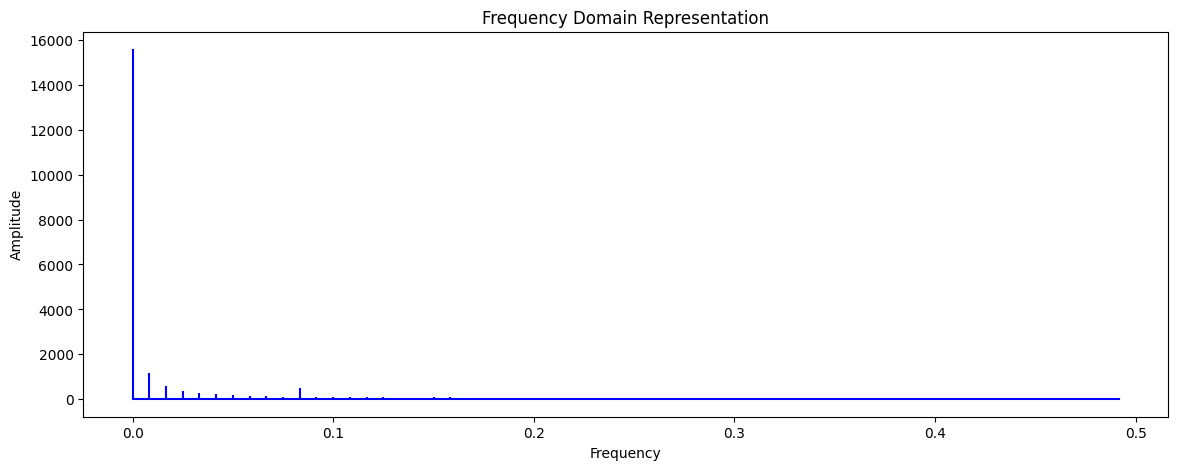

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# 生成示例数据，之前例子中用于产生时间序列的参数
np.random.seed(0)
data_length = 120
time = np.arange(data_length)
data = 100 + 0.5 * time + 10 * np.sin(2 * np.pi * time / 12) + np.random.normal(size=data_length)

# 傅里叶变换
fft_result = np.fft.fft(data)
fft_freq = np.fft.fftfreq(data_length, d=1)  # 使用默认的时间步长1个单位

# 因为FFT结果是对称的，我们只关心正频率部分
positive_freqs = fft_freq[:data_length // 2]
positive_fft = np.abs(fft_result)[:data_length // 2]

# 创建一个用于展示结果的图表
plt.figure(figsize=(14, 5))

# 绘制频率和幅度
plt.stem(positive_freqs, positive_fft, 'b', markerfmt=" ", basefmt="-b")
plt.title('Frequency Domain Representation')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.show()

